## Importing the necessary libraries

In [2]:
!pip install inference_sdk

In [4]:
pip install rembg

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import cv2
import numpy as np
from sklearn.cluster import KMeans
import os

from rembg import remove

from PIL import Image
from IPython.display import display

# import the inference-sdk
from inference_sdk import InferenceHTTPClient

## Loading the dataset

### Function for removing the background of input images

In [7]:
def remove_bg(img):
    # Convert the input image to a numpy array
    input_array = np.array(input_image)
    # Apply background removal using rembg
    output_array = remove(input_array)
    # Create a PIL Image from the output array
    output_image = Image.fromarray(output_array)
    # Ensure the output has an alpha channel for transparency handling
    output_image = output_image.convert("RGBA")
    # Create a white background image with the same size as the output
    white_background = Image.new("RGBA", output_image.size, (255, 255, 255, 255))
    # Composite the output image onto the white background
    composited_image = Image.alpha_composite(white_background, output_image)
    # Convert to RGB mode (drops alpha channel)
    composited_image = composited_image.convert("RGB")
    return composited_image

In [100]:
file = "input/original/14606444_5.jpg"
# file = "TShirt-on-bed.jpg"

# Load the input image
input_image = Image.open(file)

composited_image = remove_bg(input_image)
    
# Save the output image with a white background
composited_image.save('PNGTest1.png')

Image before removing the background:
<img src="TShirt-on-bed.jpg" alt="Drawing" style="width: 400px;"/> 

Image after removing the background:
<img src="PNGTest1.png" alt="Drawing" style="width: 400px;"/>

### Importing the input images

Add all input images of clothes to a folder called `input/original`

If the code produces an error, create a folder called `input/no_background` as well.

In [65]:
folder_path = "input/original"
filenames = []
for filename in os.listdir(folder_path):
# Check if it's a file (not a directory)
    if os.path.isfile(os.path.join(folder_path, filename)):
        filenames.append(folder_path + '/' + filename)
# filenames.remove('input/original/desktop.ini')

# filenames

for file in filenames:
    # Load the input image
    input_image = Image.open(file)

    composited_image = remove_bg(input_image)

    # Save the output image
    new_string = file[len(folder_path):]
    composited_image.save('input/no_background/' + new_string)

In [48]:
folder_path = "input/original"
filenames = []
for filename in os.listdir(folder_path):
# Check if it's a file (not a directory)
    if os.path.isfile(os.path.join(folder_path, filename)):
        filenames.append(folder_path + '/' + filename)
# filenames.remove('input/original/desktop.ini')

filenames

['input/original/145298325_1.jpg',
 'input/original/145336458_2.jpg',
 'input/original/145364239_3.jpg',
 'input/original/145364654_3.jpg',
 'input/original/145398157_9.jpg',
 'input/original/145447610_8.jpg',
 'input/original/145447610_9.jpg',
 'input/original/145459795_3.jpg',
 'input/original/14546920_4.jpg',
 'input/original/145476098_2.jpg',
 'input/original/145496261_5.jpg',
 'input/original/145505437_2.jpg',
 'input/original/145513385_9.jpg',
 'input/original/145527800_3.jpg',
 'input/original/145549309_9.jpg',
 'input/original/145562011_3.jpg',
 'input/original/145568513_3.jpg',
 'input/original/14558253_3.jpg',
 'input/original/145585069_4.jpg',
 'input/original/145586377_3.jpg',
 'input/original/145588019_3.jpg',
 'input/original/145646879_4.jpg',
 'input/original/14566039_23.jpg',
 'input/original/145667456_3.jpg',
 'input/original/145670068_3.jpg',
 'input/original/145699942_2.jpg',
 'input/original/14570653_3.jpg',
 'input/original/145719959_2.jpg',
 'input/original/145727

In [67]:
column_names = ['FileName', 'ID', 'Color', 'Casual', 'Formal', 'Party']

df = pd.DataFrame(columns=column_names)

df

,FileName,ID,Color,Casual,Formal,Party


### Detecting the Type and Occasion

In [19]:
# Loading the API Key from .env
import os
from dotenv import load_dotenv

load_dotenv()

MY_ENV_VAR = os.getenv('ROBOFLOW_API_KEY')

Using the Roboflow model trained on the manually annotated dataset.

In [21]:
# Initialize the client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key=MY_ENV_VAR
)

# Infer on a local image
result = CLIENT.infer("input/original/14606444_5.jpg", model_id="occasion-detection/1")['predicted_classes']
result

['party', 'shoes']

In [22]:
'casual' in result
# result

False

In [68]:
type_list = ['upper', 'lower', 'over', 'shoes']

type_dictionary = {
    'upper' : 0,
    'lower' : 1,
    'over' : 2,
    'shoes': 3
}

In [69]:
type_dictionary['upper']

0

In [70]:
def detectTypeOccasion(img):
    # initialize the client
    CLIENT = InferenceHTTPClient(
        api_url="https://detect.roboflow.com",
        api_key=os.getenv("ROBOFLOW_API_KEY")
    )

    # infer on a local image
    result = CLIENT.infer(img, model_id="occasion-detection/1")['predicted_classes']
    ID = None
    
    for item in type_list:
        if item in result:
            ID = type_dictionary[item]
            
    casual = 1 if 'casual' in result else 0
    party = 1 if 'party' in result else 0
    formal = 1 if 'formal' in result else 0
#     ID = 0

    print(result)
    return casual, formal, party, ID

In [71]:
file = "input/original/14546920_4.jpg"

img = Image.open(file)
casual, formal, party, ID = detectTypeOccasion(img)

['party', 'shoes']


In [72]:
[casual, formal, party, ID]

[0, 0, 1, 3]

### Detecting the Color

In [73]:
def detectColor(img):
    # Load the image
    image = cv2.imread(img)

    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Flatten the image into a 2D array of pixels
    pixels = hsv_image.reshape((-1, 3))

    # Define the number of clusters (colors) you want to detect
    num_clusters = 2 # Adjust this based on the number of colors you expect

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pixels)

    # Get the representative colors (centroids) of each cluster
    colors = kmeans.cluster_centers_

    # Convert the colors from float to integer
    colors = colors.astype(np.uint8)

    # Optionally, convert the colors to BGR and display them
    # colors_bgr = colors
    colors_rgb = cv2.cvtColor(colors.reshape(1, -1, 3), cv2.COLOR_HSV2RGB)
    #     colors_bgr = cv2.cvtColor(colors.reshape(1, -1, 3), cv2.COLOR_BGR2LAB)

    return colors_rgb[0][0]

### Filling the Data Frame

In [74]:
folder_path = "input/no_background"
filenames = []
for filename in os.listdir(folder_path):
# Check if it's a file (not a directory)
    if os.path.isfile(os.path.join(folder_path, filename)):
        filenames.append(folder_path + '/' + filename)
# filenames.remove('integrationTest/input/desktop.ini')

filenames

['input/no_background/145298325_1.jpg',
 'input/no_background/145336458_2.jpg',
 'input/no_background/145364239_3.jpg',
 'input/no_background/145364654_3.jpg',
 'input/no_background/145398157_9.jpg',
 'input/no_background/145447610_8.jpg',
 'input/no_background/145447610_9.jpg',
 'input/no_background/145459795_3.jpg',
 'input/no_background/14546920_4.jpg',
 'input/no_background/145476098_2.jpg',
 'input/no_background/145496261_5.jpg',
 'input/no_background/145505437_2.jpg',
 'input/no_background/145513385_9.jpg',
 'input/no_background/145527800_3.jpg',
 'input/no_background/145549309_9.jpg',
 'input/no_background/145562011_3.jpg',
 'input/no_background/145568513_3.jpg',
 'input/no_background/14558253_3.jpg',
 'input/no_background/145585069_4.jpg',
 'input/no_background/145586377_3.jpg',
 'input/no_background/145588019_3.jpg',
 'input/no_background/145646879_4.jpg',
 'input/no_background/14566039_23.jpg',
 'input/no_background/145667456_3.jpg',
 'input/no_background/145670068_3.jpg',
 '

In [75]:
column_names = ['FileName', 'ID', 'HSV', 'Casual', 'Formal', 'Party']

df = pd.DataFrame(columns=column_names)

for files in filenames:
    # detectColor('integrationTest/input/121986373_3.jpg')
    color = detectColor(files)
    casual, formal, party, ID = detectTypeOccasion(files)

    row = {
        'FileName': files,
        'ID' : ID,
        'HSV' : color,
        'Casual' : casual,
        'Formal' : formal,
        'Party' : party
    }

#     df = df.append(new_row, ignore_index=True)
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

df

['party', 'shoes']
['party', 'shoes']
['casual', 'shoes']
['casual', 'party', 'shoes']
['party', 'shoes']
['party', 'shoes']
['party', 'shoes']
['casual', 'party', 'shoes']
['party', 'shoes']
['party', 'shoes']
['party', 'shoes']
['party', 'shoes']
['casual', 'party', 'shoes']
['casual', 'shoes']
['casual', 'party', 'shoes']
['casual', 'shoes']
['casual', 'shoes']
['party', 'shoes']
['casual', 'party', 'shoes']
['party', 'shoes']
['party', 'shoes']
['party', 'shoes']
['casual', 'party', 'shoes']
['party', 'shoes']
['party', 'shoes']
['party', 'shoes']
['party', 'shoes']
['party', 'shoes']
['casual', 'shoes']
['casual', 'party', 'shoes']
['party', 'shoes']
['party', 'shoes']
['casual', 'party', 'shoes']
['casual', 'party', 'shoes']
['party', 'shoes']
['party', 'shoes']
['party', 'shoes']
['party', 'shoes']
['party', 'shoes']
['casual', 'shoes']
['party', 'shoes']
['party', 'shoes']
['casual', 'shoes']
['casual', 'shoes']
['casual', 'shoes']
['party', 'shoes']
['party', 'shoes']
['party'

,FileName,ID,HSV,Casual,Formal,Party
0,input/no_background/145298325_1.jpg,3,"[252, 251, 251]",0,0,1
1,input/no_background/145336458_2.jpg,3,"[243, 236, 235]",0,0,1
2,input/no_background/145364239_3.jpg,3,"[250, 250, 250]",1,0,0
3,input/no_background/145364654_3.jpg,3,"[16, 20, 15]",1,0,1
4,input/no_background/145398157_9.jpg,3,"[40, 47, 46]",0,0,1
...,...,...,...,...,...,...
236,input/no_background/207594639_3.jpg,2,"[119, 138, 162]",1,0,0
237,input/no_background/207596465_2.jpg,2,"[33, 34, 36]",1,0,0
238,input/no_background/207600167_2.jpg,2,"[215, 172, 164]",1,1,1
239,input/no_background/207602996_2.jpg,2,"[23, 24, 27]",1,1,1


In [76]:
# #converting RGB to HSV
def rgb_to_hsv(r, g, b,precision=2):
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    max_rgb = max(r, g, b)
    min_rgb = min(r, g, b)
    delta = max_rgb - min_rgb

    if delta == 0:
        h = 0
    elif max_rgb == r:
        h = (60 * ((g - b) / delta) + 360) % 360
    elif max_rgb == g:
        h = (60 * ((b - r) / delta) + 120) % 360
    else:
        h = (60 * ((r - g) / delta) + 240) % 360

    if max_rgb == 0:
        s = 0
    else:
        s = delta / max_rgb

    v = max_rgb

    return round(h), round(s, precision), round(v, precision)

df['HSV'] = df['HSV'].apply(lambda x: rgb_to_hsv(*x))
df

,FileName,ID,HSV,Casual,Formal,Party
0,input/no_background/145298325_1.jpg,3,"(0, 0.0, 0.99)",0,0,1
1,input/no_background/145336458_2.jpg,3,"(8, 0.03, 0.95)",0,0,1
2,input/no_background/145364239_3.jpg,3,"(0, 0.0, 0.98)",1,0,0
3,input/no_background/145364654_3.jpg,3,"(108, 0.25, 0.08)",1,0,1
4,input/no_background/145398157_9.jpg,3,"(171, 0.15, 0.18)",0,0,1
...,...,...,...,...,...,...
236,input/no_background/207594639_3.jpg,2,"(213, 0.27, 0.64)",1,0,0
237,input/no_background/207596465_2.jpg,2,"(220, 0.08, 0.14)",1,0,0
238,input/no_background/207600167_2.jpg,2,"(9, 0.24, 0.84)",1,1,1
239,input/no_background/207602996_2.jpg,2,"(225, 0.15, 0.11)",1,1,1


## Function for a sufficient amount of items for a specific occasion

In [77]:
df[df['Party']==1]

,FileName,ID,HSV,Casual,Formal,Party
0,input/no_background/145298325_1.jpg,3,"(0, 0.0, 0.99)",0,0,1
1,input/no_background/145336458_2.jpg,3,"(8, 0.03, 0.95)",0,0,1
3,input/no_background/145364654_3.jpg,3,"(108, 0.25, 0.08)",1,0,1
4,input/no_background/145398157_9.jpg,3,"(171, 0.15, 0.18)",0,0,1
5,input/no_background/145447610_8.jpg,3,"(18, 0.08, 0.99)",0,0,1
...,...,...,...,...,...,...
233,input/no_background/207571521_2.jpg,2,"(16, 0.16, 0.85)",1,0,1
235,input/no_background/207586100_2.jpg,2,"(335, 0.15, 0.86)",0,1,1
238,input/no_background/207600167_2.jpg,2,"(9, 0.24, 0.84)",1,1,1
239,input/no_background/207602996_2.jpg,2,"(225, 0.15, 0.11)",1,1,1


In [88]:
def is_analogous(hsv1, hsv2):
    # Calculate the absolute difference in hue
    hue_diff = abs(hsv1[0] - hsv2[0])
    # Adjust for the circular nature of the color wheel
    if hue_diff > 180:
        hue_diff = 360 - hue_diff
    # Check if the hues are within 30 degrees of each other
    return hue_diff <= 30

def is_harmonic(hsv1, hsv2):
    # Example harmonic function implementation']
    hue_diff = abs(hsv1[0] - hsv2[0])
    return hue_diff < 30 or hue_diff > 330

def is_complementary(hsv1, hsv2):
    # Example complementary function implementation
    hue_diff = abs(hsv1[0] - hsv2[0])
    return abs(hue_diff - 180) < 10

def Find_unique_outfit(df_occ, include_over=False):
    if df_occ[df_occ['ID'] == 0].empty:
        return "No upper items available for selection."

    upper_items = df_occ[df_occ['ID'] == 0]
    lower_items = df_occ[df_occ['ID'] == 1]
    shoes = df_occ[df_occ['ID'] == 3]
    overs = df_occ[df_occ['ID'] == 2] if include_over else pd.DataFrame()

    selected_uppers = upper_items if len(upper_items) <= 3 else upper_items.sample(n=3, replace=False)
    print(selected_uppers)
    color_relations = [is_harmonic, is_complementary, is_analogous]
    relation_names = ['Harmonic', 'Complementary', 'Analogous']
    outfits = []

    for _, upper in selected_uppers.iterrows():
        outfit_attempts = []
        attempts = 0

        while len(outfit_attempts) < 3 and attempts < 10:
           # Check for uniqueness=
            relation = color_relations[attempts % len(color_relations)]
            relation_name = relation_names[attempts % len(color_relations)]
            upper_hsv = upper['HSV']

            shoe_candidates = shoes[shoes['HSV'].apply(lambda x: relation(x, upper_hsv))]
            lower_candidates = lower_items[lower_items['HSV'].apply(lambda x: relation(x, upper_hsv))]
            over_candidates = overs[overs['HSV'].apply(lambda x: relation(x, upper_hsv))] if include_over else pd.DataFrame()
            if not shoe_candidates.empty:
                shoe = shoe_candidates.sample(n=1)
            else:
                attempts += 1
                continue

            if not lower_candidates.empty:
                lower = lower_candidates.sample(n=1)
            else:
                attempts += 1
                continue

            if include_over and not over_candidates.empty:
                over = over_candidates.sample(n=1)
            else:
                over = pd.DataFrame()

            # Construct a tentative outfit
            tentative_outfit = [("Upper", upper['FileName'], upper['HSV'])]
            if not shoe.empty:
                tentative_outfit.append(("Shoes", shoe.iloc[0]['FileName'], shoe.iloc[0]['HSV']))
            if not lower.empty:
                tentative_outfit.append(("Lower", lower.iloc[0]['FileName'], lower.iloc[0]['HSV']))
            if not over.empty:
                tentative_outfit.append(("Over", over.iloc[0]['FileName'], over.iloc[0]['HSV']))

            outfit_tuple = tuple([item for item in tentative_outfit])



            # Check for uniqueness
            if outfit_tuple not in outfit_attempts:
                outfit_attempts.append(outfit_tuple)
                outfits.append(tentative_outfit)  # Add to final outfits list as the formatted structure

            attempts += 1

    # Format the output to include category, color, and relation type for each outfit item
    formatted_outfits = []
    for outfit in outfits:
        formatted_outfit = {}
        for item in outfit:
            formatted_outfit[item[0]] = {'FileName': item[1], 'HSV': item[2]}
        formatted_outfits.append(formatted_outfit)

    return formatted_outfits


In [90]:
df_occ = df[df["Party"] == 1]
Find_unique_outfit(df_occ,include_over=False)
# df_occ

                               FileName ID               HSV Casual Formal  \
66  input/no_background/177538765_1.jpg  0     (0, 0.0, 1.0)      0      0   
79  input/no_background/177807948_1.jpg  0  (260, 0.1, 0.11)      1      0   
77  input/no_background/177750783_1.jpg  0  (40, 0.01, 0.93)      0      0   

   Party  
66     1  
79     1  
77     1  
                                FileName ID               HSV Casual Formal  \
101  input/no_background/178131353_1.jpg  0    (0, 0.0, 0.95)      0      0   
102  input/no_background/178155703_2.jpg  0    (0, 0.0, 0.86)      1      0   
80   input/no_background/177838651_1.jpg  0  (36, 0.15, 0.86)      0      0   

    Party  
101     1  
102     1  
80      1  
{'Upper': {'FileName': 'input/no_background/178131353_1.jpg', 'HSV': (0, 0.0, 0.95)}, 'Shoes': {'FileName': 'input/no_background/145787887_3.jpg', 'HSV': (24, 0.02, 0.97)}, 'Lower': {'FileName': 'input/no_background/193186861_3.jpg', 'HSV': (20, 0.03, 0.9)}}
{'Upper': {'FileNam

## Function for less than 100 items for a specific occasion


In [80]:
import pandas as pd
import random

#     return combinations_list
def find_unique_outfit_optimized(df_occ, include_over=False):
    # Define categories
    categories = ['Upper', 'Lower', 'Shoes']
    if include_over:
        categories.append('Over')
    category_ids = {'Upper': 0, 'Lower': 1, 'Shoes': 3, 'Over': 2}

    seen_combinations = set()
    combinations_list = []

    # Determine the smallest number of unique combinations possible
    min_combinations_possible = 1
    for category in categories:
        cat_id = category_ids[category]
        min_combinations_possible *= df_occ[df_occ['ID'] == cat_id].shape[0]

    while len(combinations_list) < 3 and len(seen_combinations) < min_combinations_possible:
        outfit = {}
        outfit_key = []

        for category in categories:
            cat_id = category_ids[category]
            if df_occ[df_occ['ID'] == cat_id].empty:
                return f"No items available in category: {category}"
            item = df_occ[df_occ['ID'] == cat_id].sample(n=1).iloc[0]
            outfit[category] = {'Name': item['ID'], 'Color': item['HSV'], 'Filename': item['FileName']}
            outfit_key.append((item['ID'], item['FileName']))  # Example key for uniqueness

        outfit_key = tuple(outfit_key)  # Convert list to tuple to use as a set key

        if outfit_key not in seen_combinations:
            seen_combinations.add(outfit_key)
            combinations_list.append(outfit)

    return combinations_list

combinations = find_unique_outfit_optimized(df[df['Party']==1],  False)
for comb in combinations:
    print(comb)

{'Upper': {'Name': 0, 'Color': (260, 0.1, 0.11), 'Filename': 'input/no_background/177807948_1.jpg'}, 'Lower': {'Name': 1, 'Color': (48, 0.18, 0.91), 'Filename': 'input/no_background/193211187_2.jpg'}, 'Shoes': {'Name': 3, 'Color': (60, 0.03, 0.25), 'Filename': 'input/no_background/145586377_3.jpg'}}
{'Upper': {'Name': 0, 'Color': (240, 0.03, 0.91), 'Filename': 'input/no_background/178060703_1.jpg'}, 'Lower': {'Name': 1, 'Color': (340, 0.05, 0.23), 'Filename': 'input/no_background/193511799_3.jpg'}, 'Shoes': {'Name': 3, 'Color': (20, 0.01, 0.96), 'Filename': 'input/no_background/145811724_6.jpg'}}
{'Upper': {'Name': 0, 'Color': (135, 0.02, 0.89), 'Filename': 'input/no_background/178174244_1.jpg'}, 'Lower': {'Name': 1, 'Color': (330, 0.01, 0.65), 'Filename': 'input/no_background/193288386_3.jpg'}, 'Shoes': {'Name': 3, 'Color': (20, 0.01, 0.96), 'Filename': 'input/no_background/145811724_6.jpg'}}


### Final Outfit Combinations

In [92]:
def find_outfits(df,occasion=None , include_over= False):
    df_occ = df[df[occasion] == 1] if occasion else df
    if len(df_occ) >= 100:
        print("enough sample to use color relations")
        result = Find_unique_outfit(df_occ,include_over)
        print("the relation function has been called")
    else:
        print("not enough sample to use color relations")
        result = find_unique_outfit_optimized(df_occ,include_over)
        print(result)
        print("the optimized function has been called")
    return result

In [98]:
outfits = find_outfits(df, "Casual", include_over = False)
# outfits = find_unique_outfit_optimized(df_occ,include_over = True)

enough sample to use color relations
                                FileName ID               HSV Casual Formal  \
96   input/no_background/178069915_1.jpg  0  (50, 0.04, 0.59)      1      0   
118  input/no_background/178476125_1.jpg  0  (36, 0.04, 0.91)      1      0   
106  input/no_background/178199817_1.jpg  0     (0, 0.0, 1.0)      1      0   

    Party  
96      0  
118     1  
106     0  
the relation function has been called


----------------------------------------
        
 	NEW OUTFIT STARTS HERE
        
----------------------------------------


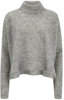

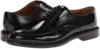

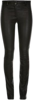

----------------------------------------
        
 	NEW OUTFIT STARTS HERE
        
----------------------------------------


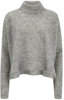

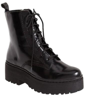

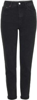

----------------------------------------
        
 	NEW OUTFIT STARTS HERE
        
----------------------------------------


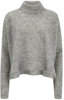

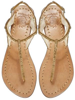

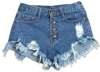

----------------------------------------
        
 	NEW OUTFIT STARTS HERE
        
----------------------------------------


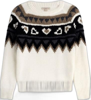

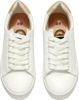

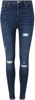

----------------------------------------
        
 	NEW OUTFIT STARTS HERE
        
----------------------------------------


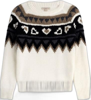

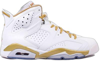

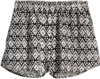

----------------------------------------
        
 	NEW OUTFIT STARTS HERE
        
----------------------------------------


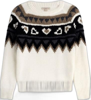

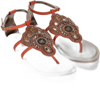

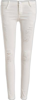

----------------------------------------
        
 	NEW OUTFIT STARTS HERE
        
----------------------------------------


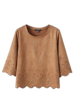

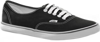

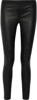

----------------------------------------
        
 	NEW OUTFIT STARTS HERE
        
----------------------------------------


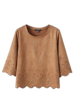

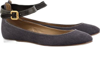

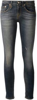

----------------------------------------
        
 	NEW OUTFIT STARTS HERE
        
----------------------------------------


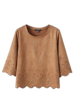

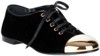

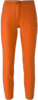

In [99]:
for outfit in outfits:
    print (
        """----------------------------------------
        \n \tNEW OUTFIT STARTS HERE
        \n----------------------------------------""")
    for item in outfit:
        img = Image.open(outfit[item]['FileName'])
#         img_resized = img.resize((50))
        width, height = img.size  # Get original dimensions

        # Calculate half the width and height
        new_width = width // 4
        new_height = height // 4

        # Resize the image using the calculated dimensions
        img_resized = img.resize((new_width, new_height))
        display(img_resized)
#     test = outfit
    
# for item in test:
#     print(test[item]['Filename'])